In [1]:
try:
    from linclab_utils import plot_utils
except ImportError as err:
    !pip install -q git+https://github.com/linclab/linclab_utils.git
    from linclab_utils import plot_utils

In [37]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
plot_utils.linclab_plt_defaults(font="Arial", fontdir="fonts")

In [3]:
api = wandb.Api()

In [4]:
# List projects
def list_projects(api, entity):
    projects = api.projects(entity)
    print("Projects:")
    for project in projects:
        print(f"- {project.name}")

In [5]:
# Fetch runs for a specific project
def fetch_runs(api, entity, project_name, filters):
    runs = api.runs(f"{entity}/{project_name}", filters=filters)
    print(f"Runs for project '{project_name}':")
    return runs

In [6]:
list_projects(api, entity='project_danns')

Projects:
- Luminosity
- Vanilla-DANN-MNIST
- Vanilla-DANN-FashionMNIST
- Vanilla-DANN-Contrast
- Homeo-DANN


In [34]:
def same_config(config1, config2):
    keys1 = set(config1.keys())
    keys2 = set(config2.keys())
    common_keys = keys1 & keys2
    for key in common_keys:
        if key == 'normtype':
            continue
        if config1[key] != config2[key]:
            return False
    return True

In [35]:
runs_nolayernorm = fetch_runs(api, entity='project_danns', project_name='Luminosity', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.1, "config.homeostasis": False, "config.normtype": "ln_false"})
runs_layernorm = fetch_runs(api, entity='project_danns', project_name='Luminosity', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.1, "config.homeostasis": False, "config.normtype": "ln_true"})

Runs for project 'Luminosity':
Runs for project 'Luminosity':


899


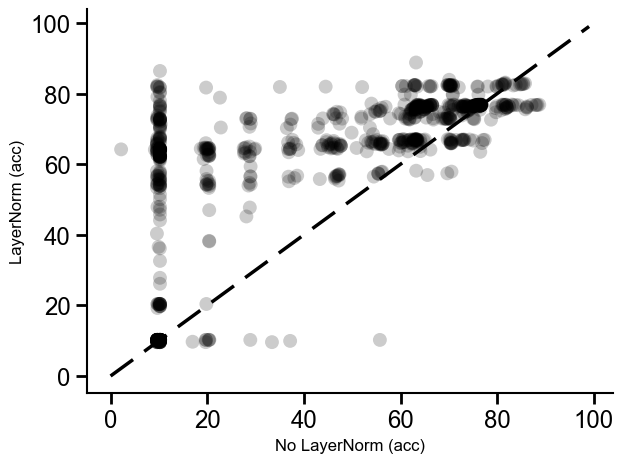

In [36]:
fig, ax = plt.subplots()
count = 0 
for run_noln in runs_nolayernorm:
    for run_ln in runs_layernorm:
        if same_config(run_noln.config, run_ln.config):
            ax.scatter(run_noln.summary['test_acc'], run_ln.summary['test_acc'], alpha=0.2, edgecolors='none', color='black')
            count += 1

ax.plot(range(100), range(100), label='y = x', color='black', linestyle='--')
ax.set_xlabel("No LayerNorm (acc)")
ax.set_ylabel("LayerNorm (acc)")
print(count)

In [39]:
runs_nolayernorm = fetch_runs(api, entity='project_danns', project_name='Luminosity_Brightness_Robustness', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.75, "config.homeostasis": False, "config.normtype": "ln_false"})
runs_layernorm = fetch_runs(api, entity='project_danns', project_name='Luminosity_Brightness_Robustness', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.75, "config.homeostasis": False, "config.normtype": "ln_true"})

Runs for project 'Luminosity_Brightness_Robustness':
Runs for project 'Luminosity_Brightness_Robustness':


In [7]:
len(runs_nolayernorm)

10

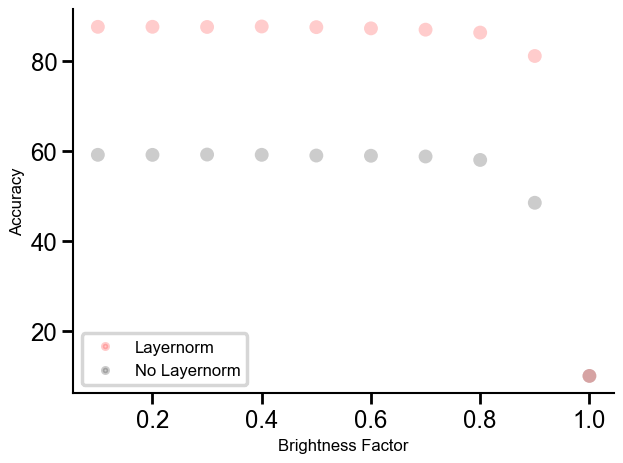

In [56]:
fig, ax = plt.subplots()


for run_noln in runs_nolayernorm:
    if run_noln.state == 'finished':
        ax.scatter(run_noln.config['brightness_factor_eval'], run_noln.summary['test_acc'], alpha=0.2, edgecolors='none', color='black')

for run_ln in runs_layernorm:
    if run_ln.state == 'finished':
        ax.scatter(run_ln.config['brightness_factor_eval'], run_ln.summary['test_acc'], alpha=0.2, edgecolors='none', color='red')

ax.set_xlabel("Brightness Factor")
ax.set_ylabel("Accuracy")

# Define custom legend elements
legend_elements = [
    Line2D([0], [0], color='red', marker='o', markersize=4, lw=2, label='Layernorm', linestyle='None', alpha=0.2),
    Line2D([0], [0], color='black', lw=2, marker='o', markersize=4, linestyle='None', label='No Layernorm', alpha=0.2)
]

# Create the legend
ax.legend(handles=legend_elements, fontsize='medium', markerscale=1)